# Advertising Dataset

**Using the advertising dataset to analyse the relationship between 'TV advertising' and 'sales' for linear regression and overall relationship using multiple linear and polynomial regression.**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
df=pd.read_csv('advertising.csv')

**Analyzing rows and columns**

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


**Checking for null values**

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Getting overall info from the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Getting statistical info from the columns of data**

In [7]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [8]:
df['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [9]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [10]:
df['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

## Data Visualization

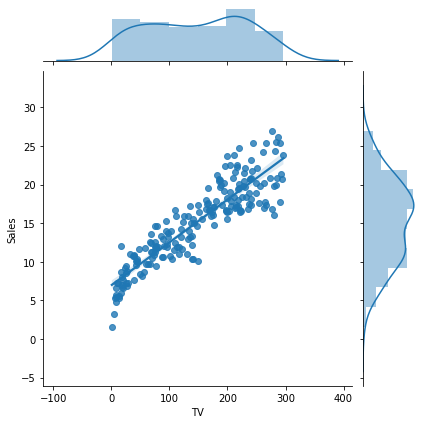

In [11]:
sns.jointplot(x='TV',y='Sales',data=df,kind='reg')

*As the plot shows there is a linear relationship between TV advertising and Sales.*

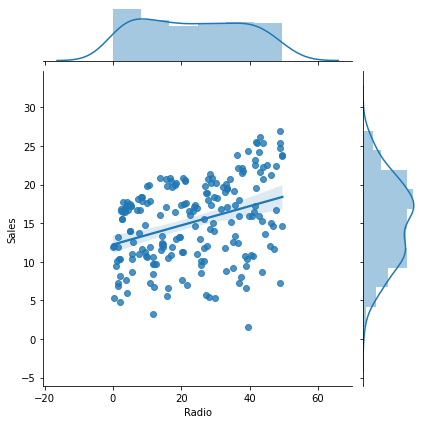

In [12]:
sns.jointplot(x='Radio',y='Sales',data=df,kind='reg')

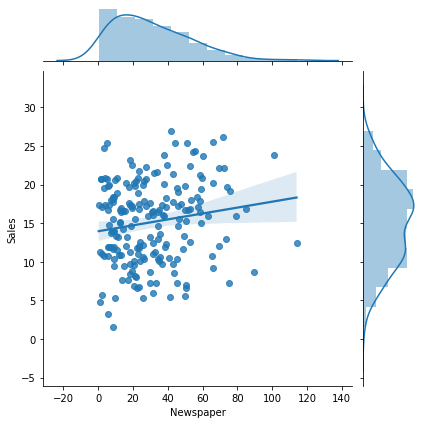

In [13]:
sns.jointplot(x='Newspaper',y='Sales',data=df,kind='reg')

*As the two plots above show that there is no linear relationship between Radio advertising, Newspaper advertising and Sales.*

**Finding the correlation between the columns**

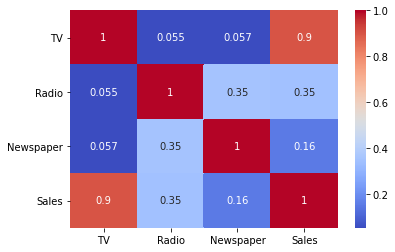

In [14]:
sns.heatmap(df.corr(), cmap="coolwarm", annot = True)

*As the heatmap for correlation between the columns show that there is a strong correlation between TV advertising and Sales and somewhat between Radio advertising and Sales.*

## Data Preprocessing 

**Detecting the outliers**

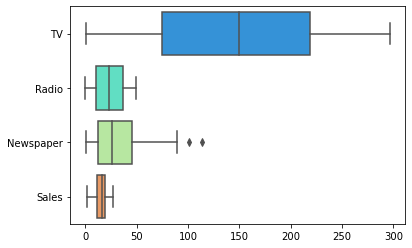

In [15]:
sns.boxplot(data=df,palette='rainbow',orient='h')

*As the boxplot shows that there are two outliers present for the Newspaper advertising.*

**Removing the outliers using the IQR(Inter-Quartile Range) method**

In [16]:
Q1 = df.Newspaper.quantile(0.25) # Outlier detection and removal using IQR
Q3 = df.Newspaper.quantile(0.75)
Q1, Q3

(12.750000000000002, 45.1)

In [17]:
IQR = Q3 - Q1
IQR

32.35

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-35.775000000000006, 93.625)

In [19]:
df[(df.Newspaper<lower_limit)|(df.Newspaper>upper_limit)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [20]:
df_no_outlier = df[(df.Newspaper>lower_limit)&(df.Newspaper<upper_limit)]
df_no_outlier

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


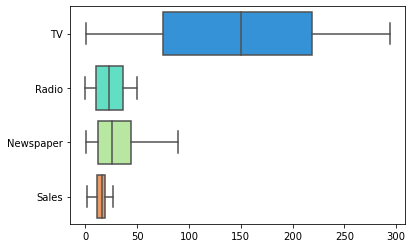

In [21]:
sns.boxplot(data=df_no_outlier,palette='rainbow',orient='h')

*Now the outliers are removed can further proceed with regression analysis.*

**Separating the dependent and independent columns for linear regression**

In [22]:
X=df_no_outlier.iloc[:,0].values
X = X.reshape(-1,1)

In [23]:
y=df_no_outlier.iloc[:,3].values
y = y.reshape(-1,1)

**Splitting the dataset into the Training set and Test set**

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Fitting Simple Linear Regression to the Training set and checking the accuracy**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=regressor.predict(X_test)

Text(0, 0.5, 'Sales')

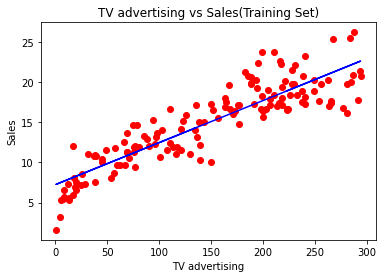

In [30]:
plt.scatter(X_train,y_train,color='red')# Visualising the Training set results
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('TV advertising vs Sales(Training Set)')
plt.xlabel('TV advertising')
plt.ylabel('Sales')


Text(0, 0.5, 'Sales')

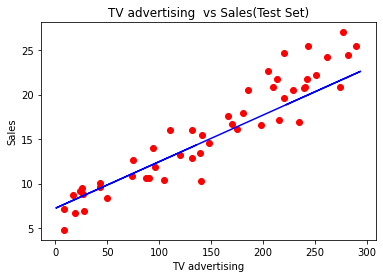

In [31]:
plt.scatter(X_test,y_test,color='red')# Visualising the Test set results
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('TV advertising  vs Sales(Test Set)')
plt.xlabel('TV advertising')
plt.ylabel('Sales')


In [32]:
print(regressor.intercept_)
print(regressor.coef_)
print(regressor.score(X_test, y_test))

[7.23773529]
[[0.05235856]]
0.8464015323589124


*The accuracy shown by the linear regression for TV advertising and Sales comparison is approx 84%.*

**Separating the dependent and independent columns for multiple linear and polynomial regression**

In [33]:
X1=df_no_outlier.iloc[:,0:-1].values


In [34]:
y1=df_no_outlier.iloc[:,3].values


**Splitting the dataset into the Training set and Test set**

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)


**Fitting Multiple Linear Regression to the Training set and checking the accuracy**

In [36]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=regressor.predict(X_test)

In [38]:
print(regressor.intercept_)
print(regressor.coef_)
print(regressor.score(X_test, y_test))

4.571825479053398
[0.05273251 0.1041084  0.00927655]
0.9203486837429763


In [39]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_pred))

print("\nActual vs Predicted Sales \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred,
                         "Abs. Error" : np.abs(y_test - y_pred)})

error_df

Prediction Accuracy =  0.9203486837429763

Actual vs Predicted Sales 
------------------------------



,Actual,Predicted,Abs. Error
0,14.6,15.004697,0.404697
1,8.4,8.586797,0.186797
2,16.0,16.208989,0.208989
3,16.7,14.685478,2.014522
4,8.8,9.599671,0.799671
5,16.0,15.222393,0.777607
6,7.2,10.817240,3.617240
7,15.5,15.241610,0.258390
8,9.2,10.092388,0.892388
9,16.6,17.549222,0.949222


*The accuracy shown by the multiple linear regression is approx 92%.*

**Splitting the dataset into the Training set and Test set and fitting Polynomial Regression to the Training set while checking the accuracy**

In [40]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2) # Polynomial equation of degree two
x_quad = quad.fit_transform(X1)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y1,test_size = 0.25,random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.9341048020921845


*The accuracy is shown by the polynomial regression for is approx 93%  and the best one compared to the linear and multilinear regression.*